In [35]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
from rapidfuzz import process, fuzz

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [36]:
# 서울특별시 2020 ~ 2024

df_seoul_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/서울특별시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_seoul_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/서울특별시_노인_보행자_사고_사고유형_2022_2024.xlsx')

df_seoul = pd.concat([df_seoul_1, df_seoul_2])
df_seoul.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010100100198,2020년 1월,수요일,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,20세 이하,상해없음,보행자,여,65세 이상,경상
1,2020010100100286,2020년 1월,수요일,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,...,흐림,기타 - 기타,승용,여,65세 이상,상해없음,보행자,여,65세 이상,중상
2,2020010100100288,2020년 1월,수요일,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,31-40세,상해없음,보행자,남,65세 이상,경상
3,2020010100100333,2020년 1월,수요일,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,기타 - 기타,승용,남,31-40세,상해없음,보행자,남,65세 이상,경상
4,2020010200100036,2020년 1월,목요일,서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승합,여,51-60세,상해없음,보행자,여,65세 이상,중상


In [37]:
# 경기도 2020 ~ 2024

df_gyeonggi_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/경기도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_gyeonggi_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/경기도_노인_보행자_사고_사고유형_2022_2024.xlsx')

df_gyeonggi = pd.concat([df_gyeonggi_1, df_gyeonggi_2])
df_gyeonggi.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010100100269,2020년 1월,수요일,경기도 수원시 팔달구 매교동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,41-50세,상해없음,보행자,여,65세 이상,중상
1,2020010100100293,2020년 1월,수요일,경기도 안산시 상록구 일동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,남,41-50세,상해없음,보행자,남,65세 이상,경상
2,2020010100100309,2020년 1월,수요일,경기도 평택시 서정동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,이륜,남,21-30세,상해없음,보행자,여,65세 이상,경상
3,2020010100100313,2020년 1월,수요일,경기도 오산시 오산동,사망사고,1,0,0,0,차대사람 - 횡단중,...,흐림,교차로 - 교차로횡단보도내,승용,남,31-40세,상해없음,보행자,남,65세 이상,사망
4,2020010200100031,2020년 1월,목요일,경기도 성남시 수정구 신흥동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,보행자,여,65세 이상,경상


In [38]:
# 강원특별자치도 2020 ~ 2024

df_gangwon_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/강원특별자치도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_gangwon_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/강원특별자치도_노인_보행자_사고_사고유형_2022_2024.xlsx')

df_gangwon = pd.concat([df_gangwon_1, df_gangwon_2])
df_gangwon.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010100100118,2020년 1월,수요일,강원도 정선군 사북읍,중상사고,0,1,0,0,차대사람 - 길가장자리구역통행중,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,보행자,남,65세 이상,중상
1,2020010200100167,2020년 1월,목요일,강원도 춘천시 후평동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,51-60세,기타불명,보행자,여,65세 이상,중상
2,2020010300100279,2020년 1월,금요일,강원도 양양군 양양읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로부근,화물,남,65세 이상,상해없음,보행자,여,65세 이상,중상
3,2020010400100155,2020년 1월,토요일,강원도 속초시 조양동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,기타 - 기타,승용,여,41-50세,상해없음,보행자,여,65세 이상,중상
4,2020010400100319,2020년 1월,토요일,강원도 양양군 양양읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,21-30세,상해없음,보행자,남,65세 이상,중상


In [39]:
# 충청북도 2020 ~ 2024
df_chungbuk_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/충청북도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_chungbuk_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/충청북도_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_chungbuk = pd.concat([df_chungbuk_1, df_chungbuk_2])

# 충청남도 2020 ~ 2024
df_chungnam_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/충청남도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_chungnam_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/충청남도_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_chungnam = pd.concat([df_chungnam_1, df_chungnam_2])

# 충청도 2020 ~ 2024
df_chungcheong = pd.concat([df_chungbuk, df_chungnam])
df_chungcheong.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010200100043,2020년 1월,목요일,충청북도 청주시 상당구 대성동,경상사고,0,0,1,0,차대사람 - 보도통행중,...,맑음,교차로 - 교차로횡단보도내,승용,남,61-64세,상해없음,보행자,여,65세 이상,경상
1,2020010200100323,2020년 1월,목요일,충청북도 청주시 흥덕구 복대동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,기타 - 기타,승용,남,51-60세,상해없음,보행자,여,65세 이상,경상
2,2020010300100052,2020년 1월,금요일,충청북도 괴산군 장연면,사망사고,1,0,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,여,51-60세,상해없음,보행자,여,65세 이상,사망
3,2020010400100083,2020년 1월,토요일,충청북도 청주시 상당구 석교동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,단일로 - 지하차도(도로)내,화물,남,41-50세,상해없음,보행자,남,65세 이상,중상
4,2020010500100249,2020년 1월,일요일,충청북도 청주시 흥덕구 복대동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,51-60세,상해없음,보행자,여,65세 이상,경상


In [40]:
# 전라북도 2020 ~ 2024
df_jeonbuk_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/전북특별자치도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_jeonbuk_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/전북특별자치도_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_jeonbuk = pd.concat([df_jeonbuk_1, df_jeonbuk_2])

# 전라남도 2020 ~ 2024
df_jeonnam_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/전라남도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_jeonnam_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/전라남도_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_jeonnam = pd.concat([df_jeonnam_1, df_jeonnam_2])

# 전라도 2020 ~ 2024
df_jeolla= pd.concat([df_jeonbuk, df_jeonnam])
df_jeolla.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010100100131,2020년 1월,수요일,전라북도 정읍시 산외면,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,61-64세,상해없음,보행자,남,65세 이상,중상
1,2020010200100172,2020년 1월,목요일,전라북도 익산시 동산동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,보행자,여,65세 이상,중상
2,2020010300100324,2020년 1월,금요일,전라북도 남원시 수지면,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,건설기계,남,31-40세,상해없음,보행자,남,65세 이상,경상
3,2020010500100117,2020년 1월,일요일,전라북도 익산시 신동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,51-60세,상해없음,보행자,남,65세 이상,중상
4,2020010600100309,2020년 1월,월요일,전라북도 정읍시 연지동,중상사고,0,1,0,0,차대사람 - 횡단중,...,비,단일로 - 기타,화물,남,65세 이상,상해없음,보행자,남,65세 이상,중상


In [41]:
# 경상북도 2020 ~ 2024
df_gyeongbuk_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/경상북도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_gyeongbuk_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/경상북도_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_gyeongbuk = pd.concat([df_gyeongbuk_1, df_gyeongbuk_2])
# 경상남도 2020 ~ 2024
df_gyeongnam_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/경상남도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_gyeongnam_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/경상남도_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_gyeongnam = pd.concat([df_gyeongnam_1, df_gyeongnam_2])
# 경상도 2020 ~ 2024
df_gyeongsang = pd.concat([df_gyeongbuk, df_gyeongnam])
df_gyeongsang.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010200100124,2020년 1월,목요일,경상북도 영덕군 영덕읍,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,화물,남,21-30세,상해없음,보행자,여,65세 이상,경상
1,2020010200100329,2020년 1월,목요일,경상북도 경주시 감포읍,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,51-60세,상해없음,보행자,여,65세 이상,중상
2,2020010300100364,2020년 1월,금요일,경상북도 포항시 남구 해도동,경상사고,0,0,1,0,차대사람 - 기타,...,흐림,교차로 - 교차로부근,승용,남,61-64세,상해없음,보행자,여,65세 이상,경상
3,2020010500100164,2020년 1월,일요일,경상북도 포항시 남구 동해면,중상사고,0,2,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,여,41-50세,상해없음,보행자,남,65세 이상,중상
4,2020010500100330,2020년 1월,일요일,경상북도 경주시 충효동,사망사고,1,0,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,여,31-40세,상해없음,보행자,여,65세 이상,사망


In [42]:
# 인천광역시 2020 ~ 2024
df_incheon_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/인천광역시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_incheon_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/인천광역시_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_incheon = pd.concat([df_incheon_1, df_incheon_2])
df_incheon.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010300100457,2020년 1월,금요일,인천광역시 서구 연희동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,교차로 - 교차로안,승용,남,41-50세,상해없음,보행자,여,65세 이상,중상
1,2020010400100405,2020년 1월,토요일,인천광역시 남동구 구월동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,교차로 - 교차로안,승용,남,51-60세,상해없음,보행자,여,65세 이상,중상
2,2020010600100114,2020년 1월,월요일,인천광역시 계양구 임학동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,여,51-60세,상해없음,보행자,여,65세 이상,중상
3,2020010600100159,2020년 1월,월요일,인천광역시 부평구 삼산동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,여,65세 이상,상해없음,보행자,남,65세 이상,경상
4,2020010700100729,2020년 1월,화요일,인천광역시 서구 신현동,중상사고,0,1,0,0,차대사람 - 횡단중,...,비,교차로 - 교차로안,승용,남,41-50세,상해없음,보행자,여,65세 이상,중상


In [43]:
# 대전광역시 2020 ~ 2024
df_daejeon_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/대전광역시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_daejeon_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/대전광역시_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_daejeon = pd.concat([df_daejeon_1, df_daejeon_2])
df_daejeon.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010200100210,2020년 1월,목요일,대전광역시 서구 탄방동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,이륜,남,21-30세,상해없음,보행자,여,65세 이상,경상
1,2020010200100525,2020년 1월,목요일,대전광역시 서구 변동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,이륜,남,31-40세,상해없음,보행자,여,65세 이상,중상
2,2020010300100376,2020년 1월,금요일,대전광역시 대덕구 오정동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승합,남,41-50세,상해없음,보행자,여,65세 이상,경상
3,2020010400100087,2020년 1월,토요일,대전광역시 중구 대사동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,보행자,남,65세 이상,중상
4,2020010600100077,2020년 1월,월요일,대전광역시 유성구 지족동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,21-30세,상해없음,보행자,여,65세 이상,중상


In [44]:
# 대구광역시 2020 ~ 2024
df_daegu_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/대구광역시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_daegu_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/대구광역시_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_daegu = pd.concat([df_daegu_1, df_daegu_2])
df_daegu.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010200100462,2020년 1월,목요일,대구광역시 달성군 다사읍,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,21-30세,상해없음,보행자,남,65세 이상,중상
1,2020010300100259,2020년 1월,금요일,대구광역시 달서구 성당동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,보행자,여,65세 이상,중상
2,2020010300100293,2020년 1월,금요일,대구광역시 달서구 대곡동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,자전거,남,20세 이하,상해없음,보행자,여,65세 이상,중상
3,2020010500100108,2020년 1월,일요일,대구광역시 중구 대신동,중상사고,0,1,1,0,차대사람 - 보도통행중,...,맑음,교차로 - 교차로안,승용,여,41-50세,상해없음,보행자,남,65세 이상,중상
4,2020010500100126,2020년 1월,일요일,대구광역시 달서구 상인동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,교차로 - 교차로부근,승용,남,65세 이상,상해없음,보행자,남,65세 이상,중상


In [45]:
# 광주광역시 2020 ~ 2024
df_gwangju_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/광주광역시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_gwangju_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/광주광역시_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_gwangju = pd.concat([df_gwangju_1, df_gwangju_2])
df_gwangju.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010200100154,2020년 1월,목요일,광주광역시 남구 주월동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,기타 - 기타,화물,여,65세 이상,상해없음,보행자,여,65세 이상,경상
1,2020010200100424,2020년 1월,목요일,광주광역시 서구 풍암동,중상사고,0,1,0,0,차대사람 - 기타,...,흐림,주차장 - 주차장,승용,남,65세 이상,상해없음,보행자,여,65세 이상,중상
2,2020010400100143,2020년 1월,토요일,광주광역시 서구 화정동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,특수,남,21-30세,상해없음,보행자,남,65세 이상,경상
3,2020010400100186,2020년 1월,토요일,광주광역시 남구 봉선동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,41-50세,상해없음,보행자,여,65세 이상,경상
4,2020010700100153,2020년 1월,화요일,광주광역시 남구 구동,중상사고,0,1,0,0,차대사람 - 횡단중,...,비,교차로 - 교차로안,승용,여,41-50세,상해없음,보행자,여,65세 이상,중상


In [46]:
# 세종특별자치시 2020 ~ 2024
df_sejong_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/세종특별자치시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_sejong_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/세종특별자치시_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_sejong = pd.concat([df_sejong_1, df_sejong_2])
df_sejong.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020011600100307,2020년 1월,목요일,세종특별자치시 부강면,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,기타 - 기타,화물,남,21-30세,상해없음,보행자,남,65세 이상,중상
1,2020011800100086,2020년 1월,토요일,세종특별자치시 반곡동,중상사고,0,1,0,0,차대사람 - 횡단중,...,흐림,교차로 - 교차로횡단보도내,승용,남,51-60세,상해없음,보행자,여,65세 이상,중상
2,2020012000100330,2020년 1월,월요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,보행자,남,65세 이상,중상
3,2020012500100241,2020년 1월,토요일,세종특별자치시 전의면,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,31-40세,상해없음,보행자,남,65세 이상,경상
4,2020012800100374,2020년 1월,화요일,세종특별자치시 연서면,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,화물,남,51-60세,상해없음,보행자,여,65세 이상,중상


In [47]:
# 울산광역시 2020 ~ 2024
df_ulsan_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/울산광역시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_ulsan_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/울산광역시_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_ulsan = pd.concat([df_ulsan_1, df_ulsan_2])
df_ulsan.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010200100106,2020년 1월,목요일,울산광역시 중구 남외동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,여,31-40세,상해없음,보행자,여,65세 이상,중상
1,2020010400100304,2020년 1월,토요일,울산광역시 울주군 온양읍,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승합,여,41-50세,상해없음,보행자,남,65세 이상,중상
2,2020010400100343,2020년 1월,토요일,울산광역시 울주군 청량읍,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승합,남,41-50세,기타불명,보행자,여,65세 이상,경상
3,2020010400100531,2020년 1월,토요일,울산광역시 북구 중산동,중상사고,0,1,0,0,차대사람 - 길가장자리구역통행중,...,맑음,단일로 - 기타,승합,남,51-60세,상해없음,보행자,남,65세 이상,중상
4,2020010600100288,2020년 1월,월요일,울산광역시 울주군 웅촌면,중상사고,0,1,0,0,차대사람 - 기타,...,비,단일로 - 지하차도(도로)내,승합,남,31-40세,상해없음,보행자,남,65세 이상,중상


In [48]:
# 부산광역시 2020 ~ 2024
df_busan_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/부산광역시_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_busan_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/부산광역시_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_busan = pd.concat([df_busan_1, df_busan_2])
df_busan.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010100100290,2020년 1월,수요일,부산광역시 강서구 강동동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,남,51-60세,상해없음,보행자,남,65세 이상,경상
1,2020010200100387,2020년 1월,목요일,부산광역시 서구 동대신동2가,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,61-64세,상해없음,보행자,여,65세 이상,중상
2,2020010300100049,2020년 1월,금요일,부산광역시 남구 우암동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,교차로 - 교차로안,승용,남,65세 이상,상해없음,보행자,여,65세 이상,중상
3,2020010400100418,2020년 1월,토요일,부산광역시 동구 초량동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,교차로 - 교차로안,승용,남,21-30세,상해없음,보행자,남,65세 이상,경상
4,2020010400100466,2020년 1월,토요일,부산광역시 해운대구 중동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,이륜,남,41-50세,상해없음,보행자,여,65세 이상,중상


In [49]:
# 제주특별자치도 2020 ~ 2024
df_jeju_1 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/제주특별자치도_노인_보행자_사고_사고유형_2020_2021.xlsx')
df_jeju_2 = pd.read_excel('../data/시도_시군구별_노인_보행자_사고_사고유형/제주특별자치도_노인_보행자_사고_사고유형_2022_2024.xlsx')
df_jeju = pd.concat([df_jeju_1, df_jeju_2])
df_jeju.head()

,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010200100263,2020년 1월,목요일,제주특별자치도 서귀포시 대정읍,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,화물,남,65세 이상,상해없음,보행자,여,65세 이상,경상
1,2020010300100058,2020년 1월,금요일,제주특별자치도 서귀포시 토평동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,여,51-60세,상해없음,보행자,여,65세 이상,중상
2,2020010400100101,2020년 1월,토요일,제주특별자치도 제주시 한림읍,사망사고,1,0,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,화물,남,65세 이상,상해없음,보행자,여,65세 이상,사망
3,2020010400100369,2020년 1월,토요일,제주특별자치도 서귀포시 상효동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,화물,남,65세 이상,상해없음,보행자,여,65세 이상,중상
4,2020010500100361,2020년 1월,일요일,제주특별자치도 제주시 오라삼동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승합,남,41-50세,상해없음,보행자,여,65세 이상,중상


In [50]:
# 이름: 데이터프레임 dict 생성
df_dict = {
    "서울": df_seoul,
    "경기": df_gyeonggi,
    "강원": df_gangwon,
    "충청": df_chungcheong,
    "전라": df_jeolla,
    "경상": df_gyeongsang,
    "인천": df_incheon,
    "대전": df_daejeon,
    "대구": df_daegu,
    "광주": df_gwangju,
    "세종": df_sejong,
    "울산": df_ulsan,
    "부산": df_busan,
    "제주": df_jeju
}

In [51]:
# 결측치 확인
for name, df in df_dict.items():
    if df.isnull().values.any():
        print(f"🚨 {name} 데이터프레임에 결측치가 있습니다.")
        print(df.isnull().sum())  # 어떤 열에 결측이 있는지도 출력
        print("-" * 40)
    else:
        print(f"✅ {name} 데이터프레임에 결측치가 없습니다.")

✅ 서울 데이터프레임에 결측치가 없습니다.
✅ 경기 데이터프레임에 결측치가 없습니다.
✅ 강원 데이터프레임에 결측치가 없습니다.
✅ 충청 데이터프레임에 결측치가 없습니다.
✅ 전라 데이터프레임에 결측치가 없습니다.
✅ 경상 데이터프레임에 결측치가 없습니다.
✅ 인천 데이터프레임에 결측치가 없습니다.
✅ 대전 데이터프레임에 결측치가 없습니다.
✅ 대구 데이터프레임에 결측치가 없습니다.
✅ 광주 데이터프레임에 결측치가 없습니다.
✅ 세종 데이터프레임에 결측치가 없습니다.
✅ 울산 데이터프레임에 결측치가 없습니다.
✅ 부산 데이터프레임에 결측치가 없습니다.
✅ 제주 데이터프레임에 결측치가 없습니다.


In [52]:
# 피해운전자 차종이 모두 보행자인지 확인
for name, df in df_dict.items():
    if df['피해운전자 차종'].isin(['보행자']).all():
        print(f"✅ {name} 데이터프레임의 피해운전자 차종은 모두 보행자입니다.")
    else:
        print(f"🚨 {name} 데이터프레임의 피해운전자 차종에 보행자가 아닌 값이 존재합니다.")
        print(df[df['피해운전자 차종'] != '보행자'])

✅ 서울 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 경기 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 강원 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 충청 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 전라 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 경상 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 인천 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 대전 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 대구 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 광주 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 세종 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 울산 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 부산 데이터프레임의 피해운전자 차종은 모두 보행자입니다.
✅ 제주 데이터프레임의 피해운전자 차종은 모두 보행자입니다.


In [53]:
# 구분번호, 요일, 법규위반, 노면상태, 기상상태, 가해운전자 차종, 가해운전자 성별, 가해운전자 연령대, 가해운전자 상해정도, 피해운전자 차종, 피해운전자 성별, 피해운전자 연령대 삭제
for name, df in df_dict.items():
    df.drop(
        ['구분번호', '요일', '법규위반', '노면상태', '기상상태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령대', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령대'],
        axis=1, inplace=True)
    print(f"✅ {name} 데이터프레임에서 열이 삭제되었습니다.")

✅ 서울 데이터프레임에서 열이 삭제되었습니다.
✅ 경기 데이터프레임에서 열이 삭제되었습니다.
✅ 강원 데이터프레임에서 열이 삭제되었습니다.
✅ 충청 데이터프레임에서 열이 삭제되었습니다.
✅ 전라 데이터프레임에서 열이 삭제되었습니다.
✅ 경상 데이터프레임에서 열이 삭제되었습니다.
✅ 인천 데이터프레임에서 열이 삭제되었습니다.
✅ 대전 데이터프레임에서 열이 삭제되었습니다.
✅ 대구 데이터프레임에서 열이 삭제되었습니다.
✅ 광주 데이터프레임에서 열이 삭제되었습니다.
✅ 세종 데이터프레임에서 열이 삭제되었습니다.
✅ 울산 데이터프레임에서 열이 삭제되었습니다.
✅ 부산 데이터프레임에서 열이 삭제되었습니다.
✅ 제주 데이터프레임에서 열이 삭제되었습니다.


In [54]:
# 하나로 합치기
df_total = pd.concat(df_dict.values())

# 발생년월 -> 연도, 월
df_total['연도'] = df_total['발생년월'].str.extract(r'(\d{4})').astype(int)         # 연도 추출
# df_total['월'] = df_total['발생년월'].str.extract(r'(\d{1,2})월').astype(int)       # 월 추출

# 연도와 월을 앞으로 이동
# first_cols = ['연도', '월'] + [col for col in df_total.columns if col not in ['연도', '월']]
first_cols = ['연도'] + [col for col in df_total.columns if col not in ['연도']]
df_total = df_total[first_cols]
df_total.drop('발생년월', axis=1, inplace=True) # 발생년월 삭제

df_total.head()

,연도,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,도로형태,피해운전자 상해정도
0,2020,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
1,2020,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,기타 - 기타,중상
2,2020,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,교차로 - 교차로안,경상
3,2020,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,기타 - 기타,경상
4,2020,서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,교차로 - 교차로횡단보도내,중상


In [55]:
HTML(df_total.head(10).to_html(index=False, escape=False, border=0))

연도,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,도로형태,피해운전자 상해정도
2020,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
2020,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,기타 - 기타,중상
2020,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,교차로 - 교차로안,경상
2020,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,기타 - 기타,경상
2020,서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,교차로 - 교차로횡단보도내,중상
2020,서울특별시 구로구 구로동,중상사고,0,1,0,0,차대사람 - 횡단중,단일로 - 기타,중상
2020,서울특별시 성북구 동선동1가,경상사고,0,0,2,0,차대사람 - 횡단중,단일로 - 기타,경상
2020,서울특별시 동대문구 휘경동,부상신고사고,0,0,0,1,차대사람 - 차도통행중,단일로 - 기타,부상신고
2020,서울특별시 강북구 수유동,중상사고,0,1,0,0,차대사람 - 기타,단일로 - 기타,중상
2020,서울특별시 동작구 신대방동,경상사고,0,0,1,0,차대사람 - 보도통행중,교차로 - 교차로횡단보도내,경상


In [56]:
df_code = pd.read_csv('../data/법정동코드.csv')
code_names = df_code['지역명'].astype(str).tolist()         # 지역명을 리스트로 변경

# 시군구 기준으로 유사 지역명을 찾아 법정동코드 매핑
matched_codes = []
for query in df_total['시군구'].astype(str):
    match, score, index = process.extractOne(query, code_names, scorer=fuzz.token_sort_ratio)

    if score >= 60:  # 유사도 임계값 설정
        matched_code = df_code.iloc[index]['법정동코드']
    else:
        matched_code = None  # 매칭 실패

    matched_codes.append(matched_code)


df_total['법정동코드'] = matched_codes                              # 법정동코드 컬럼으로 추가
df_total.insert(2, '법정동코드', df_total.pop('법정동코드'))           # 법정동코드 열을 세 번째 열로 이동

# 매핑 성공 여부 확인
print("✅ 결측치 개수:", df_total['법정동코드'].isnull().sum())
print("❌ 매핑 실패 예시:")
print(df_total[df_total['법정동코드'].isnull()][['시군구']].head())


✅ 결측치 개수: 0
❌ 매핑 실패 예시:
Empty DataFrame
Columns: [시군구]
Index: []


In [57]:
# 최종 결측 확인
print(df_total.isnull().sum())

# 연도, 법정동코드 기준 내림차순 정렬
df_total = df_total.sort_values(by=['연도', '법정동코드'], ascending=[True, True])

df_total.reset_index(drop=True, inplace=True)       # 인덱스 정리
df_total

연도            0
시군구           0
법정동코드         0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형          0
도로형태          0
피해운전자 상해정도    0
dtype: int64


,연도,시군구,법정동코드,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,도로형태,피해운전자 상해정도
0,2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로부근,중상
1,2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로안,중상
2,2020,서울특별시 종로구 통인동,1111010800,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
3,2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 차도통행중,교차로 - 교차로안,경상
4,2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
...,...,...,...,...,...,...,...,...,...,...,...
51666,2024,전북특별자치도 부안군 행안면,5280033000,중상사고,0,1,0,0,차대사람 - 차도통행중,주차장 - 주차장,중상
51667,2024,전북특별자치도 부안군 계화면,5280034000,중상사고,0,1,0,0,차대사람 - 길가장자리구역통행중,교차로 - 교차로부근,중상
51668,2024,전북특별자치도 부안군 보안면,5280035000,중상사고,0,1,0,0,차대사람 - 횡단중,단일로 - 기타,중상
51669,2024,전북특별자치도 부안군 보안면,5280035000,사망사고,1,0,0,0,차대사람 - 차도통행중,미분류 - 미분류,사망


In [58]:
HTML(df_total.head(10).to_html(index=False, escape=False, border=0))

연도,시군구,법정동코드,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,도로형태,피해운전자 상해정도
2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로부근,중상
2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로안,중상
2020,서울특별시 종로구 통인동,1111010800,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 차도통행중,교차로 - 교차로안,경상
2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
2020,서울특별시 종로구 내자동,1111011400,경상사고,0,0,1,0,차대사람 - 기타,기타 - 기타,경상
2020,서울특별시 종로구 당주동,1111011700,중상사고,0,1,0,0,차대사람 - 횡단중,교차로 - 교차로횡단보도내,중상
2020,서울특별시 종로구 세종로,1111011900,중상사고,0,1,0,0,차대사람 - 차도통행중,단일로 - 기타,중상
2020,서울특별시 종로구 서린동,1111012300,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
2020,서울특별시 종로구 운니동,1111013200,경상사고,0,0,1,0,차대사람 - 차도통행중,단일로 - 기타,경상


In [59]:
df_elderly_rate = pd.read_excel('../data/시군구_고령자_비율.xlsx')
df_elderly_rate

,시도,시군구,2020_총 인구,2021_총 인구,2022_총 인구,2023_총 인구,2024_총 인구,2020_고령자 수,2021_고령자 수,2022_고령자 수,2023_고령자 수,2024_고령자 수,2020_고령자 비율 (%),2021_고령자 비율 (%),2022_고령자 비율 (%),2023_고령자 비율 (%),2024_고령자 비율 (%)
0,전국,전체,51829023,51638809,51439038,51325329,51217221,8496077,8851033,9267290,9730411,10256782,16.4,17.1,18,19,20
1,서울특별시,전체,9668465,9509458,9428372,9386034,9331828,1561139,1597447,1658207,1733580,1813648,16.1,16.8,17.6,18.5,19.4
2,부산광역시,전체,3391946,3350380,3317812,3293362,3266598,657711,681885,712412,745199,780576,19.4,20.4,21.5,22.6,23.9
3,대구광역시,전체,2418346,2385412,2363691,2374960,2363629,400494,417060,435698,466338,493256,16.6,17.5,18.4,19.6,20.9
4,인천광역시,전체,2942828,2948375,2967314,2997410,3021010,411483,435431,463850,497057,533369,14,14.8,15.6,16.6,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,경상남도,함양군,39080,38310,37708,36945,36131,13227,13494,13769,14001,14215,33.8,35.2,36.5,37.9,39.3
243,경상남도,거창군,61502,61073,60387,60047,59588,17026,17545,18035,18536,19182,27.7,28.7,29.9,30.9,32.2
244,경상남도,합천군,44006,42935,42142,41203,40225,17431,17590,17757,17922,18205,39.6,41,42.1,43.5,45.3
245,제주특별자치도,제주시,492466,493096,493389,491654,488348,70720,73797,77364,81115,85251,14.4,15,15.7,16.5,17.5


In [60]:
# 시군구가 전체인 행 제거
df_elderly_rate = df_elderly_rate[df_elderly_rate['시군구'] != '전체']
df_elderly_rate.head()

,시도,시군구,2020_총 인구,2021_총 인구,2022_총 인구,2023_총 인구,2024_총 인구,2020_고령자 수,2021_고령자 수,2022_고령자 수,2023_고령자 수,2024_고령자 수,2020_고령자 비율 (%),2021_고령자 비율 (%),2022_고령자 비율 (%),2023_고령자 비율 (%),2024_고령자 비율 (%)
18,서울특별시,종로구,149384,144683,141379,139417,138336,28311,27609,27704,28500,29574,19,19.1,19.6,20.4,21.4
19,서울특별시,중구,125240,122499,120437,121312,120544,24174,24037,24660,25525,26408,19.3,19.6,20.5,21,21.9
20,서울특별시,용산구,230040,222953,218650,213151,203854,39779,38552,38478,39239,38894,17.3,17.3,17.6,18.4,19.1
21,서울특별시,성동구,293556,285990,281000,277361,273669,45435,46201,47530,49260,51030,15.5,16.2,16.9,17.8,18.6
22,서울특별시,광진구,346682,339996,337416,335554,331963,50311,51450,53737,56461,59334,14.5,15.1,15.9,16.8,17.9


In [61]:
# 연도     시도        시군구      XXXX_총 인구    XXXX_고령자 수    XXXX_고령자 비율 (%)
# 2020    서울특별시    종로구       100             40          40.0
# 2020    서울특별시    성동구       100             30          30.0
# 2020    서울특별시    용산구       100             20          20.0

# 위의 형태로 분리

years = range(2020, 2025)
df_elderly_year_dict = {}

# 연도별로 데이터프레임 분리하여 저장
for year in years:
    df_year = df_elderly_rate[[
        '시도', '시군구',
        f'{year}_총 인구',
        f'{year}_고령자 수',
        f'{year}_고령자 비율 (%)'
    ]].copy()

    df_year.columns = ['시도', '시군구', '총 인구', '고령자 수', '고령자 비율 (%)']
    df_year['연도'] = year
    df_year = df_year[['연도', '시도', '시군구', '총 인구', '고령자 수', '고령자 비율 (%)']]                                          # 열 순서 조정
    df_elderly_year_dict[year] = df_year                                                                                  # 딕셔너리에 저장
    df_elderly_year_dict[year]['시군구'] = df_elderly_year_dict[year]['시도'] + ' ' + df_elderly_year_dict[year]['시군구']    # 시도 + 시군구 >> 시군구
    df_elderly_year_dict[year] = df_elderly_year_dict[year].drop(columns=['시도'])                                         # 시도 컬럼 삭제

# 총 5개의 데이터 프레임: df_elderly_year_dict[2020], df_elderly_year_dict[2021], ..., df_elderly_year_dict[2024]
df_elderly_year_dict[2020]

,연도,시군구,총 인구,고령자 수,고령자 비율 (%)
18,2020,서울특별시 종로구,149384,28311,19
19,2020,서울특별시 중구,125240,24174,19.3
20,2020,서울특별시 용산구,230040,39779,17.3
21,2020,서울특별시 성동구,293556,45435,15.5
22,2020,서울특별시 광진구,346682,50311,14.5
...,...,...,...,...,...
242,2020,경상남도 함양군,39080,13227,33.8
243,2020,경상남도 거창군,61502,17026,27.7
244,2020,경상남도 합천군,44006,17431,39.6
245,2020,제주특별자치도 제주시,492466,70720,14.4


In [62]:
# 연도      시군구              법정동코드          사고내용   사망자수  ...  총 인구     고령자 수    고령자 비율 (%)
# 2020     서울시 종로구 창성동   1111010500       중상사고      0          100          25          25.0
# 2020     서울시 종로구 창성동   1111010500       중상사고      0          100          25          25.0
# 2020     서울시 종로구 통인동   1111010800       중상사고      0          100          25          25.0
# 2020     서울시 XXX구 OOO동   11________       중상사고      0          100          50          50.0
# 2020     서울시 XXX구 OOO동   11________       중상사고      0          100          50          50.0
# 2020     서울시 XXX구 OOO동   11________       중상사고      0          100          50          50.0
# ...
# 2024

# >>>

# 연도      시군구              법정동코드          사고내용   사망자수  ...  총 인구     고령자 수    고령자 비율 (%)
# 2020     서울시 종로구 창성동   1111010500       중상사고      0          100                  
# 2020     서울시 종로구 창성동   1111010500       중상사고      0          100          25          25.0
# 2020     서울시 종로구 통인동   1111010800       중상사고      0          100     
# --------------------------------------------------------------------------------------------------            
# 2020     서울시 XXX구 OOO동   11________       중상사고      0          100                  
# 2020     서울시 XXX구 OOO동   11________       중상사고      0          100          50          50.0
# 2020     서울시 XXX구 OOO동   11________       중상사고      0          100                   
# ...
# 2024

# 시도 중

In [63]:
# df_total: 사고 정보가 있는 상세 주소 데이터프레임
# df_elderly_year_dict: 연도별 고령자 정보 딕셔너리

def merge_elderly_to_total(df_total, df_elderly_year_dict):
    matched_data = []

    for idx, row in df_total.iterrows():
        year = row['연도']
        region_detail = row['시군구']

        if year not in df_elderly_year_dict:
            matched_data.append({'총 인구': None, '고령자 수': None, '고령자 비율 (%)': None})
            continue

        df_elderly = df_elderly_year_dict[year]

        # Fuzzy matching
        match_result = process.extractOne(
            region_detail,
            df_elderly['시군구'],
            scorer=fuzz.token_sort_ratio
        )

        if match_result is None:
            matched_data.append({'총 인구': None, '고령자 수': None, '고령자 비율 (%)': None})
            continue

        match_str, score, _ = match_result

        if score >= 60:
            match_row = df_elderly[df_elderly['시군구'] == match_str].iloc[0]
            matched_data.append({
                '총 인구': match_row['총 인구'],
                '고령자 수': match_row['고령자 수'],
                '고령자 비율 (%)': match_row['고령자 비율 (%)']
            })
        else:
            matched_data.append({'총 인구': None, '고령자 수': None, '고령자 비율 (%)': None})

    df_match = pd.DataFrame(matched_data)
    return pd.concat([df_total.reset_index(drop=True), df_match], axis=1)


df_total_enriched = merge_elderly_to_total(df_total, df_elderly_year_dict)
df_total_enriched.head()

,연도,시군구,법정동코드,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,도로형태,피해운전자 상해정도,총 인구,고령자 수,고령자 비율 (%)
0,2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로부근,중상,149384,28311,19
1,2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로안,중상,149384,28311,19
2,2020,서울특별시 종로구 통인동,1111010800,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상,149384,28311,19
3,2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 차도통행중,교차로 - 교차로안,경상,149384,28311,19
4,2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상,149384,28311,19


In [64]:
HTML(df_total_enriched.head(10).to_html(index=False, escape=False, border=0))

연도,시군구,법정동코드,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,도로형태,피해운전자 상해정도,총 인구,고령자 수,고령자 비율 (%)
2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로부근,중상,149384,28311,19
2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로안,중상,149384,28311,19
2020,서울특별시 종로구 통인동,1111010800,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상,149384,28311,19
2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 차도통행중,교차로 - 교차로안,경상,149384,28311,19
2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상,149384,28311,19
2020,서울특별시 종로구 내자동,1111011400,경상사고,0,0,1,0,차대사람 - 기타,기타 - 기타,경상,149384,28311,19
2020,서울특별시 종로구 당주동,1111011700,중상사고,0,1,0,0,차대사람 - 횡단중,교차로 - 교차로횡단보도내,중상,149384,28311,19
2020,서울특별시 종로구 세종로,1111011900,중상사고,0,1,0,0,차대사람 - 차도통행중,단일로 - 기타,중상,149384,28311,19
2020,서울특별시 종로구 서린동,1111012300,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상,149384,28311,19
2020,서울특별시 종로구 운니동,1111013200,경상사고,0,0,1,0,차대사람 - 차도통행중,단일로 - 기타,경상,149384,28311,19


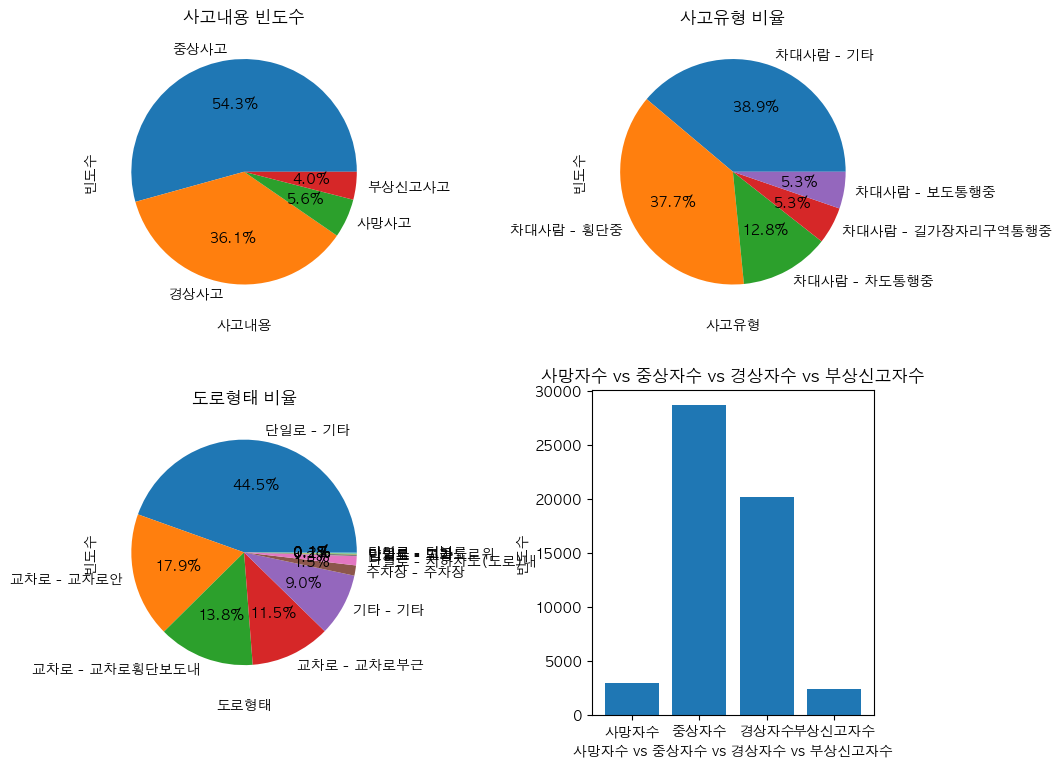

In [65]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
df_total_enriched['사고내용'].value_counts()
df_total_enriched['사고내용'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('사고내용 빈도수')
plt.xlabel('사고내용')
plt.ylabel('빈도수')

plt.subplot(2, 2, 2)
df_total_enriched['사고유형'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('사고유형 비율')
plt.xlabel('사고유형')
plt.ylabel('빈도수')

plt.subplot(2, 2, 3)
df_total_enriched['도로형태'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('도로형태 비율')
plt.xlabel('도로형태')
plt.ylabel('빈도수')

plt.subplot(2, 2, 4)
plt.bar(['사망자수', '중상자수', '경상자수', '부상신고자수'], [df_total_enriched['사망자수'].sum(), df_total_enriched['중상자수'].sum(), df_total_enriched['경상자수'].sum(), df_total_enriched['부상신고자수'].sum()])
plt.title('사망자수 vs 중상자수 vs 경상자수 vs 부상신고자수')
plt.xlabel('사망자수 vs 중상자수 vs 경상자수 vs 부상신고자수')
plt.ylabel('빈도수')

plt.tight_layout()
plt.show()